In [10]:
%matplotlib inline

import pandas as pd

dataframe = pd.read_csv('./data/airline/international-airline-passengers.csv',
                        usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values.astype('float32')

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [13]:
import numpy as np

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM

model = Sequential()

model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0102
Epoch 2/100
 - 1s - loss: 0.0058
Epoch 3/100
 - 1s - loss: 0.0049
Epoch 4/100
 - 1s - loss: 0.0043
Epoch 5/100
 - 1s - loss: 0.0039
Epoch 6/100
 - 1s - loss: 0.0038
Epoch 7/100
 - 1s - loss: 0.0037
Epoch 8/100
 - 1s - loss: 0.0035
Epoch 9/100
 - 1s - loss: 0.0034
Epoch 10/100
 - 1s - loss: 0.0035
Epoch 11/100
 - 1s - loss: 0.0035
Epoch 12/100
 - 1s - loss: 0.0034
Epoch 13/100
 - 1s - loss: 0.0034
Epoch 14/100
 - 1s - loss: 0.0034
Epoch 15/100
 - 1s - loss: 0.0034
Epoch 16/100
 - 1s - loss: 0.0035
Epoch 17/100
 - 1s - loss: 0.0033
Epoch 18/100
 - 1s - loss: 0.0034
Epoch 19/100
 - 1s - loss: 0.0034
Epoch 20/100
 - 1s - loss: 0.0033
Epoch 21/100
 - 1s - loss: 0.0034
Epoch 22/100
 - 1s - loss: 0.0034
Epoch 23/100
 - 1s - loss: 0.0034
Epoch 24/100
 - 1s - loss: 0.0032
Epoch 25/100
 - 1s - loss: 0.0034
Epoch 26/100
 - 1s - loss: 0.0033
Epoch 27/100
 - 1s - loss: 0.0034
Epoch 28/100
 - 1s - loss: 0.0033
Epoch 29/100
 - 1s - loss: 0.0032
Epoch 30/100
 - 1s - lo

In [17]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainYEnd = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testYEnd = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainYEnd[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(testYEnd[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 23.96
Test RMSE: 56.26


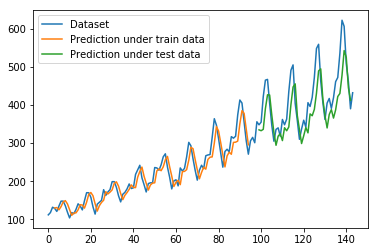

In [18]:
import matplotlib.pyplot as plt

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(trainPredictPlot, label='Prediction under train data')
plt.plot(testPredictPlot, label='Prediction under test data')
plt.legend()
plt.show()

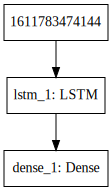

In [19]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))